In [1]:
# In this project, i will try to see if i can predict the sentiment of
# a product review using machine learning model with python.

In [12]:
# import statement

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") 
np.random.seed(7) # seeding random number generato

In [3]:
# load and read the file

data = pd.read_csv('amazon_reviews.csv')

In [4]:
data.head(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


In [11]:
data.shape

(4915, 12)

In [5]:
df = data.copy()

In [6]:
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


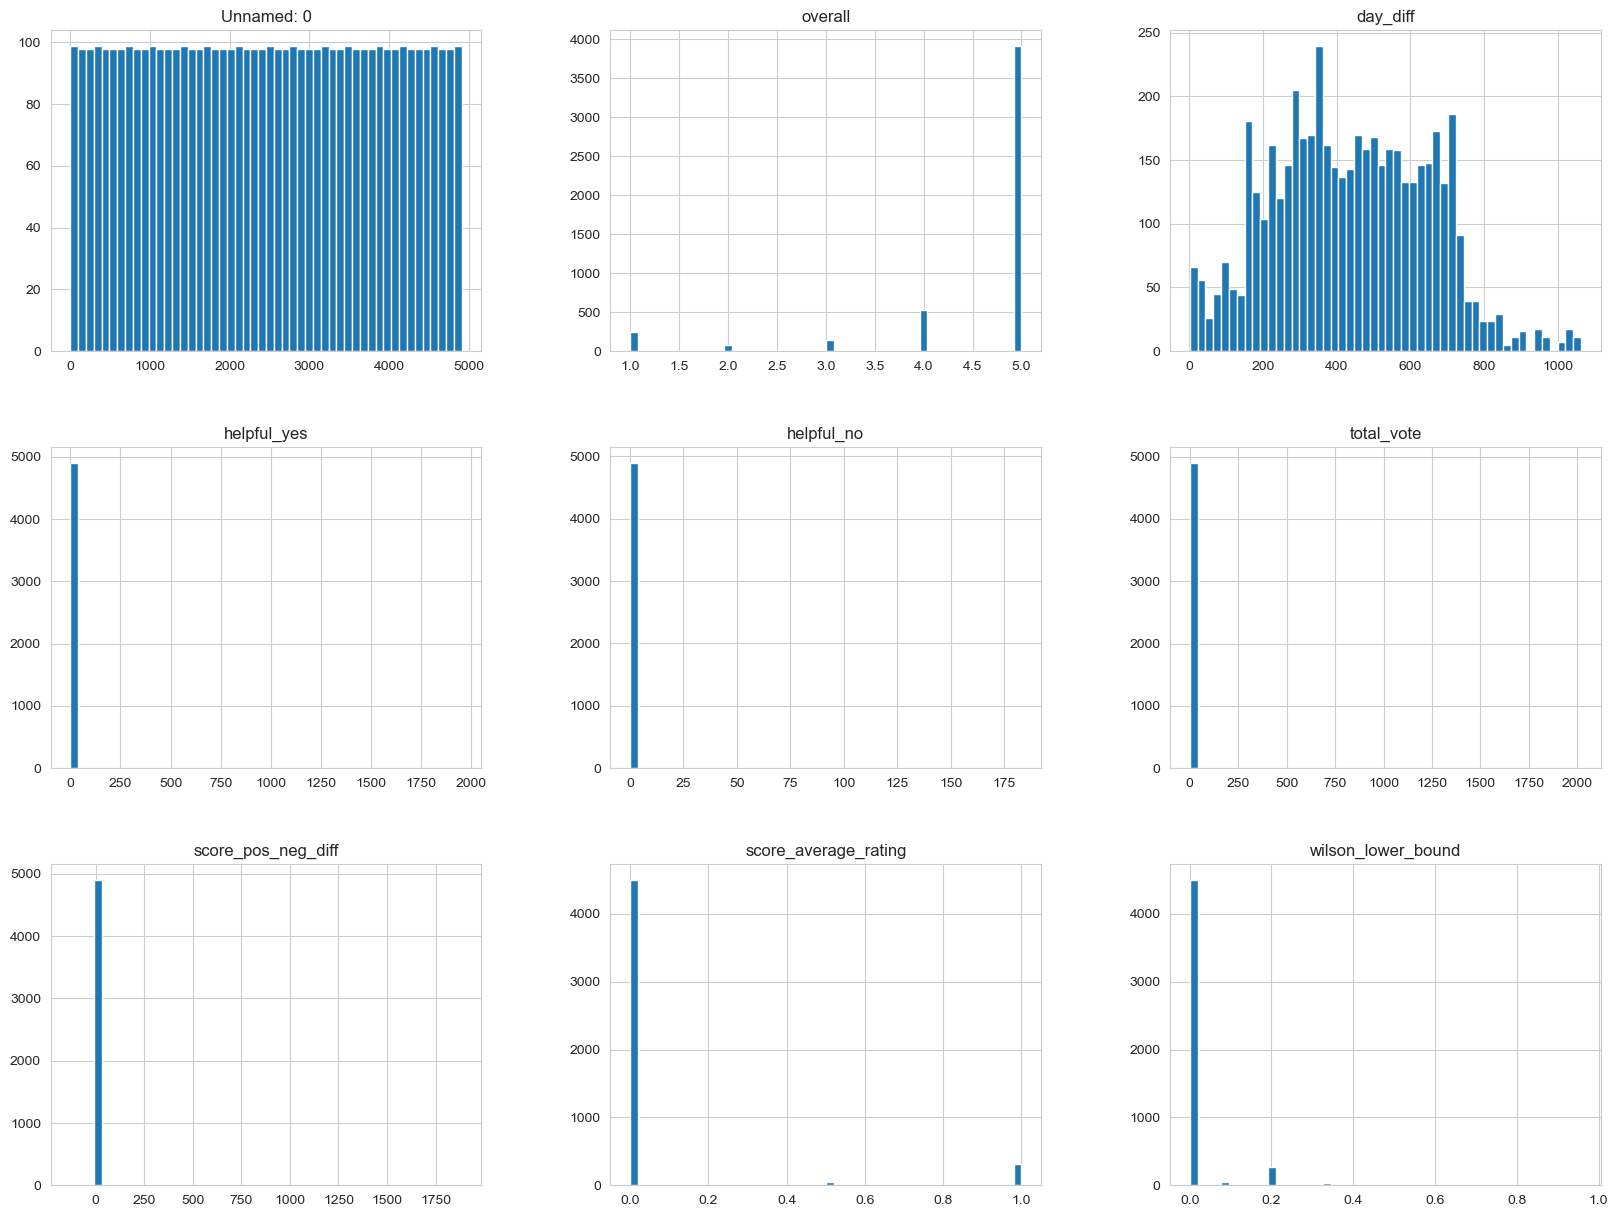

In [9]:
# data distribution of quantitative(numeric) columns

df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# Majority of examples were rated highly (looking at overall distribution).
# There amount of 5 star ratings is greather than the others ratings combined, for that
# will need to do a stratified split on the reviews score to ensure that we don’t train
# the classifier on imbalanced data



In [13]:
# Let's split the data into Train and Test

print("Before {}".format(len(df)))
df_after = df.dropna(subset=["overall"])
# Removes all NAN in overall if there is any
print("After {}".format(len(df_after)))
df_after["overall"] = df_after["overall"].astype(int)

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(df_after,
                                           df_after["overall"]):
    strat_train = df_after.reindex(train_index)
    strat_test = df_after.reindex(test_index)

Before 4915
After 4915


In [ ]:
#  Let's see how train and test sets were stratified

In [16]:
print(len(strat_train))


3932


In [15]:
print(len(strat_test))

983


In [17]:
print(strat_test["overall"].value_counts()/len(strat_test))

5    0.797558
4    0.107833
1    0.049847
3    0.028484
2    0.016277
Name: overall, dtype: float64


In [18]:
reviews = strat_train.copy()
reviews.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
3836,3836,Rich,5,Work great with my Samsung Galaxy S4. Simple t...,2014-06-01,190,0,0,0,0,0.0,0.0
1510,1510,"Eduardo R. Felipe ""Eduardo""",4,Always bought Sandisk memories for my cameras ...,2013-12-11,362,0,0,0,0,0.0,0.0
4407,4407,Talon8Ya,5,I've purchased 3 of the 32gb cards now. One ea...,2013-04-27,590,0,0,0,0,0.0,0.0
3069,3069,"Max Hallen ""MMM""",5,Package arrived before estimated time (well Do...,2014-03-23,260,0,0,0,0,0.0,0.0
3406,3406,"Nelson E. Ingersoll ""Nelson""",5,Fits in my new Samsung Note 3. Holds lots of ...,2014-05-21,201,0,0,0,0,0.0,0.0


In [23]:
print(len(df['reviewerName'].unique()))


4595


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [25]:
# Sentiment Analysis


In [28]:
def sentiment_user(overall):
    if (overall == 5) or (overall == 4):
        return "Positive"
    elif overall == 3:
        return "Neutral"
    elif (overall == 2) or (overall == 1):
        return "Negative"
# Add user_sentiments to the data
strat_train["User_sentiment"] = strat_train["overall"].apply(sentiment_user)
strat_test["User_sentiment"] = strat_test["overall"].apply(sentiment_user)
print(strat_train["User_sentiment"][:50])

3836    Positive
1510    Positive
4407    Positive
3069    Positive
3406    Positive
1879    Positive
2092    Positive
1292    Positive
1196    Positive
2880    Positive
3699    Positive
3798     Neutral
4806    Positive
1509    Positive
4231    Negative
4146    Positive
1657    Positive
1000    Positive
3663    Positive
859     Positive
2326    Positive
3968    Positive
4043    Positive
1032     Neutral
4195    Positive
3491    Negative
2725    Positive
3200    Positive
4068    Positive
3812    Positive
1914    Positive
1663    Positive
597     Positive
3130    Positive
2297    Positive
1316    Positive
986     Positive
2339    Positive
2732    Positive
4540    Positive
943     Positive
2591    Positive
2749    Positive
627     Positive
1396    Positive
647     Positive
2587    Positive
1225    Positive
1947    Positive
3743    Positive
Name: User_sentiment, dtype: object
